# Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


# Loading Data

In [2]:
data=pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")

In [3]:
data.shape

(319795, 18)

In [4]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Data Analysis

#### 1/ Extract features names :  

In [5]:
data.columns.to_list()

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

#### 2/ features types - number of nan values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### 3/ plot data types with a pie 

<AxesSubplot:ylabel='None'>

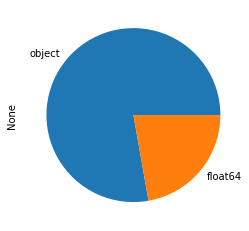

In [7]:
data.dtypes.value_counts().plot.pie()

In [8]:
data.dtypes.value_counts()

object     14
float64     4
dtype: int64

In [9]:
data["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

#### 4/Statistique descriptive

In [10]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [11]:
data.describe(include='all')
## all for categorical and numercial features

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [12]:
data.describe(include='O')
# O for categoorical features

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


#### 5/Correlation 

the dependency between features

In [13]:
corr=data.corr()

<AxesSubplot:>

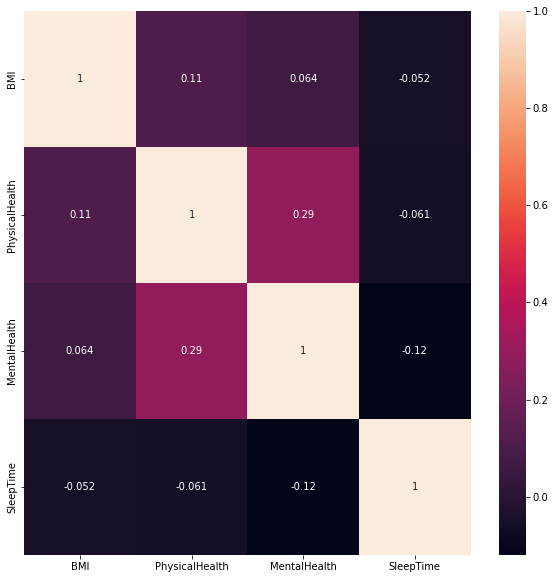

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

### Categorical Data  / Numerical_data

In [15]:
categorical_data=[]
numerical_data=[]
for i,c in enumerate(data.dtypes):
    if c=='object':
        categorical_data.append(data.iloc[:,i])
    else:
        numerical_data.append(data.iloc[:,i])

In [16]:
categorical_data=pd.DataFrame(categorical_data).transpose()
numerical_data=pd.DataFrame(numerical_data).transpose()

In [17]:
categorical_data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


In [18]:
numerical_data

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


### Categorical data 

#### 1/ Extract classes for each feature

##### using all the dataset

In [19]:
for col in data.select_dtypes('object'):
    print(col,data[col].unique())

HeartDisease ['No' 'Yes']
Smoking ['Yes' 'No']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
DiffWalking ['No' 'Yes']
Sex ['Female' 'Male']
AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ['Yes' 'No']
GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma ['Yes' 'No']
KidneyDisease ['No' 'Yes']
SkinCancer ['Yes' 'No']


##### using categorical_data

In [20]:
categorical_data.nunique()

HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

#### 2/ Categorical_data histogramme

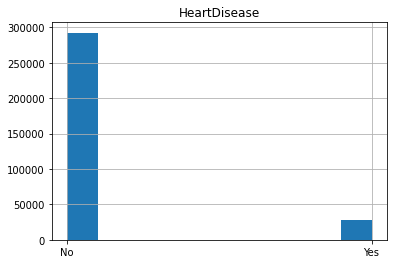

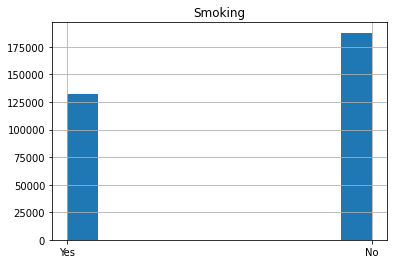

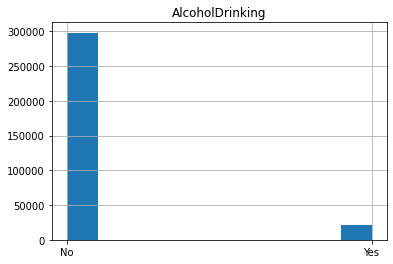

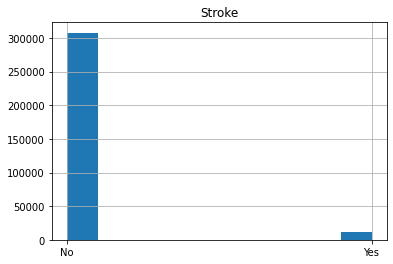

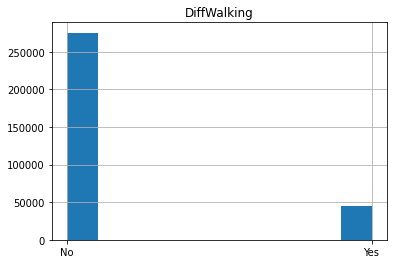

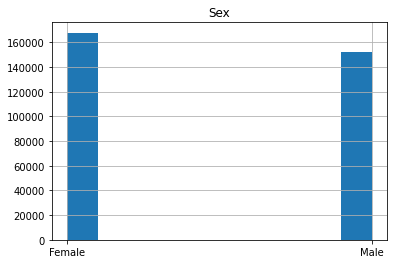

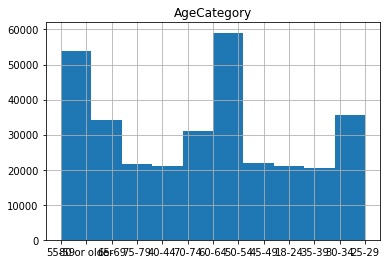

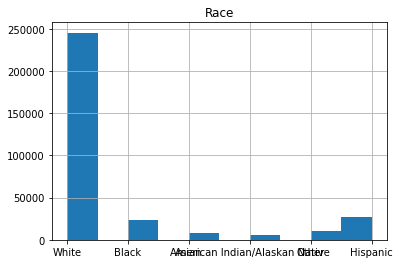

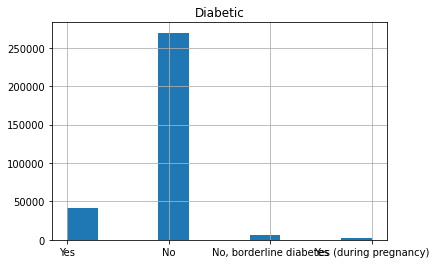

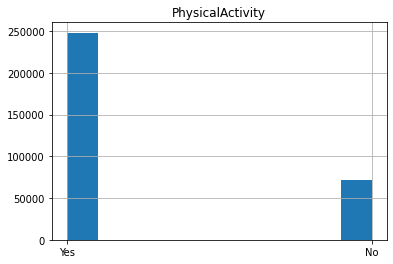

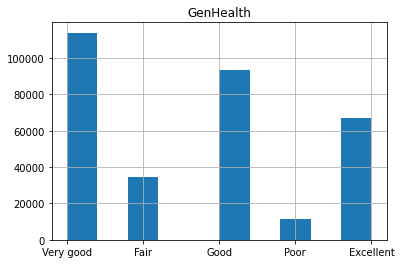

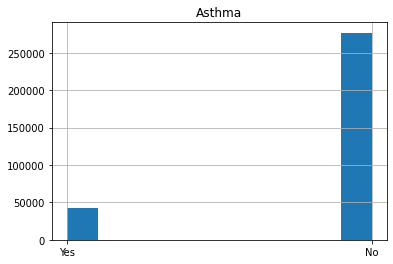

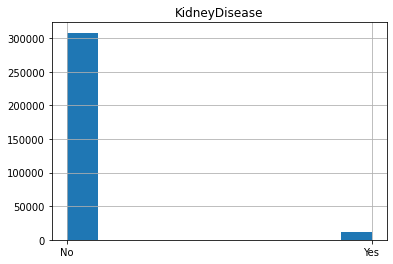

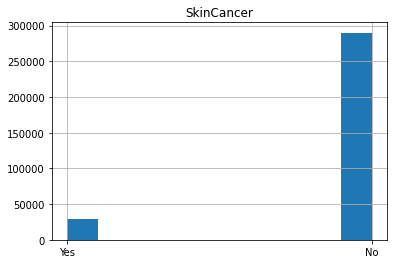

In [21]:
for col in categorical_data:
    categorical_data[col].hist()
    plt.title(col)
    plt.show()

#### 3/ categorical data pie 

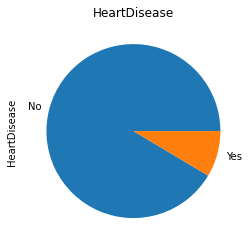

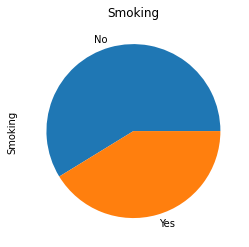

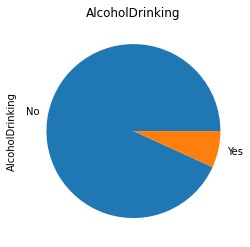

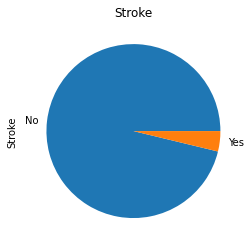

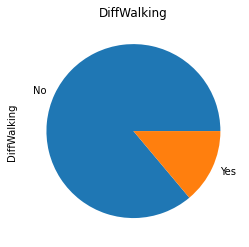

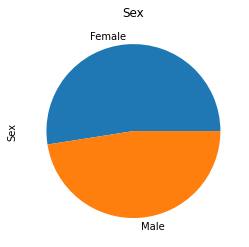

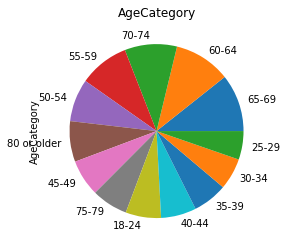

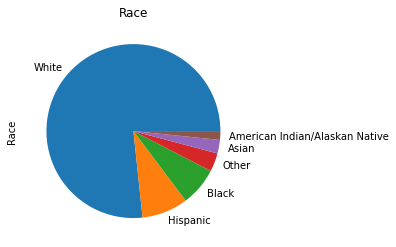

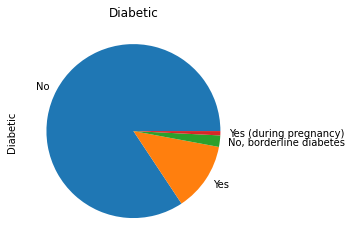

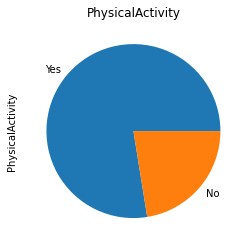

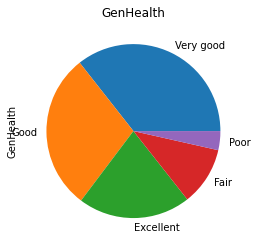

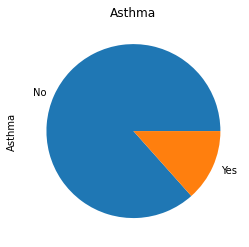

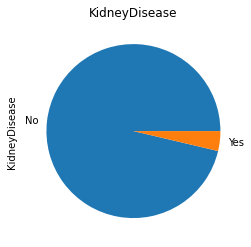

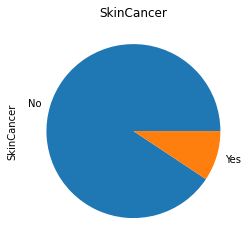

In [22]:
for col in categorical_data:
   
    plt.show()
    plt.title(col)
    categorical_data[col].value_counts().plot.pie()

#plt .show to create a figure  for each feature 

#### 4/ Relation between categorical data and target  


**** the first method **** Cross tabulation

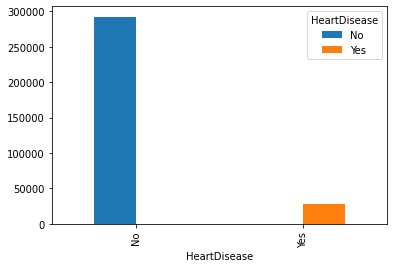

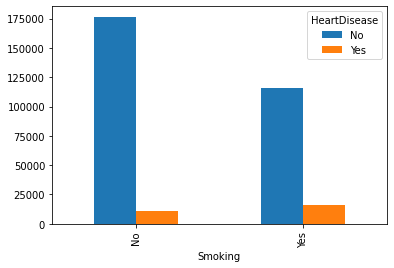

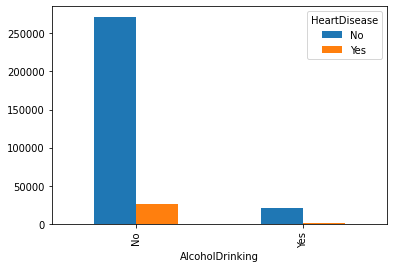

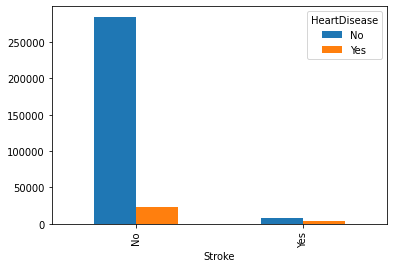

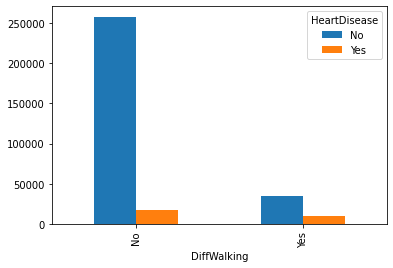

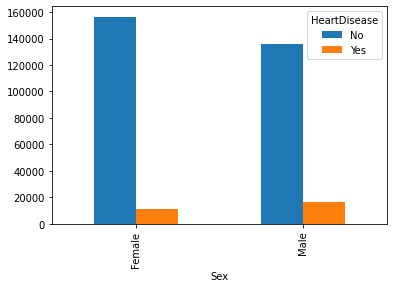

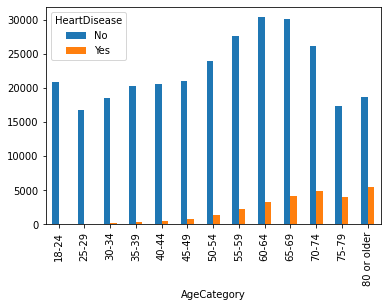

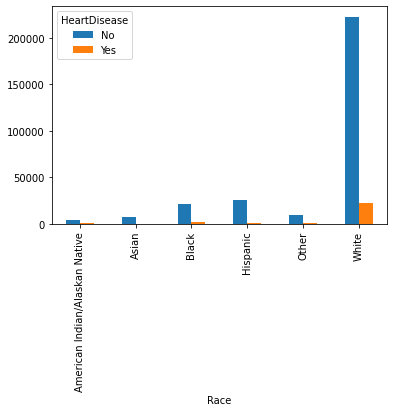

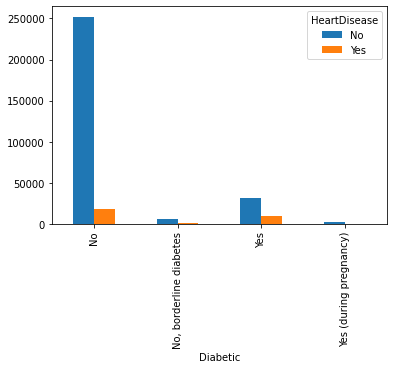

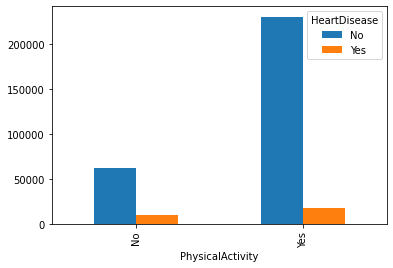

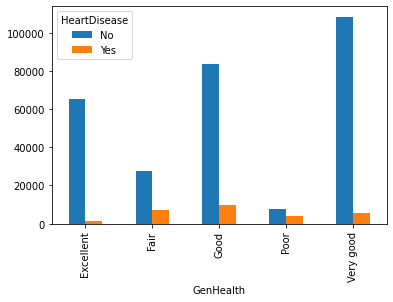

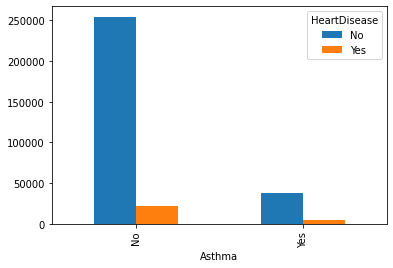

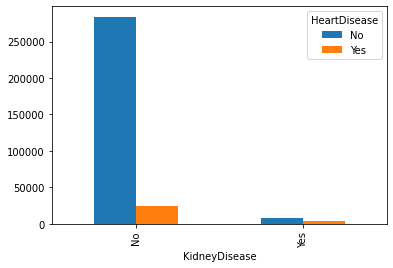

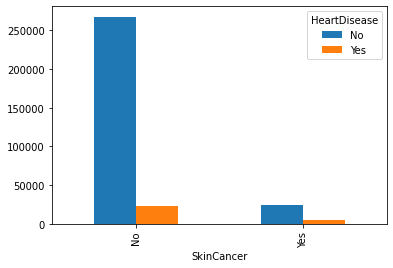

In [23]:
for col in categorical_data:
    # Cross tabulation between variable and HeartDisease
    CrosstabResult=pd.crosstab(index=categorical_data[col],columns=categorical_data['HeartDisease'])
    #print(CrosstabResult)
    # Grouped bar chart between col and HeartDisease
    CrosstabResult.plot.bar()

**** the second method**** 

######  we should  encode categorical fetaures  

In [24]:
categorical_data= categorical_data[categorical_data.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
categorical_data['Diabetic'] = categorical_data['Diabetic'].astype(int) 

######  We have some attributes that have more than two unique values, we'll use OneHotEncoder in the preprocessing step later

In [25]:
categorical_data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,55-59,White,1,1,Very good,1,0,1
1,0,0,0,1,0,0,80 or older,White,0,1,Very good,0,0,0
2,0,1,0,0,0,1,65-69,White,1,1,Fair,1,0,0
3,0,0,0,0,0,0,75-79,White,0,0,Good,0,0,1
4,0,0,0,0,1,0,40-44,White,0,1,Very good,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,60-64,Hispanic,1,0,Fair,1,0,0
319791,0,1,0,0,0,1,35-39,Hispanic,0,1,Very good,1,0,0
319792,0,0,0,0,0,0,45-49,Hispanic,0,1,Good,0,0,0
319793,0,0,0,0,0,0,25-29,Hispanic,0,0,Good,0,0,0


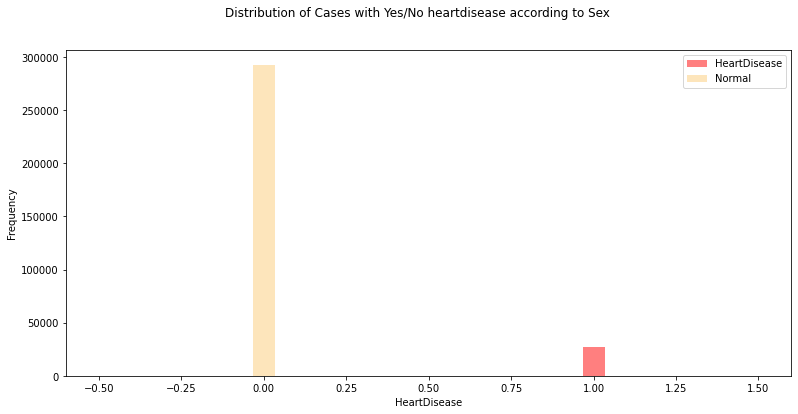

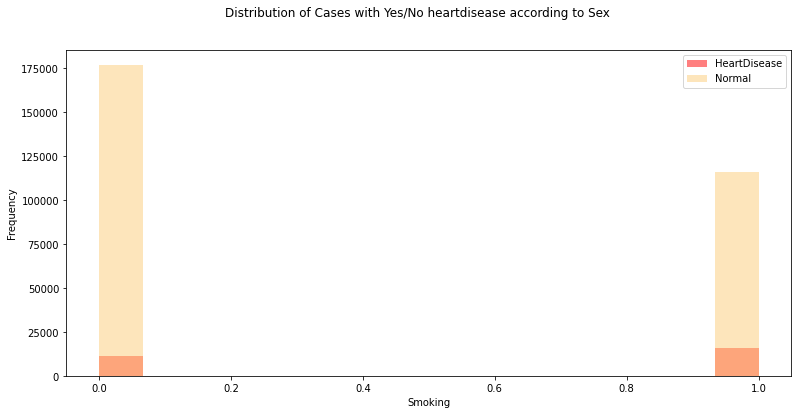

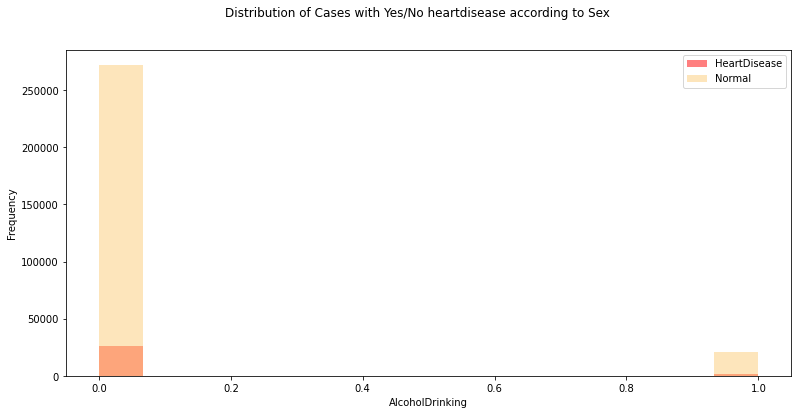

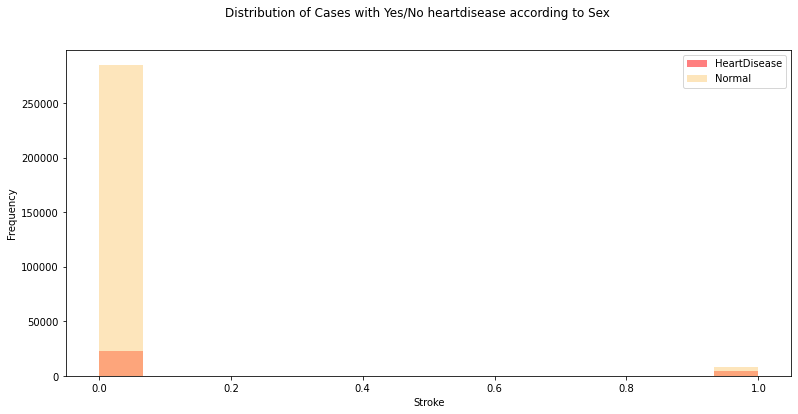

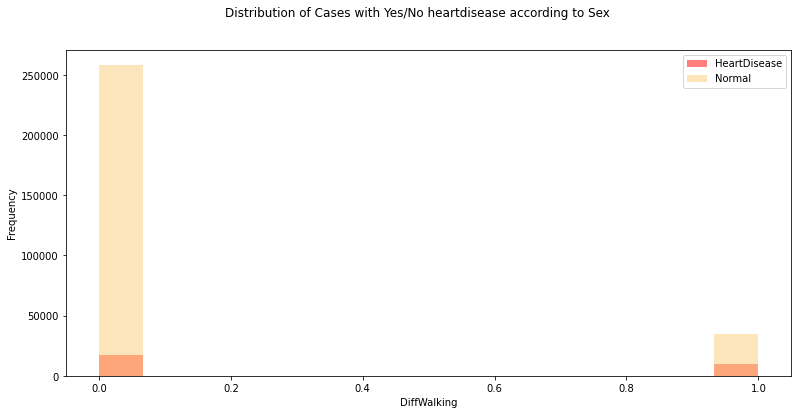

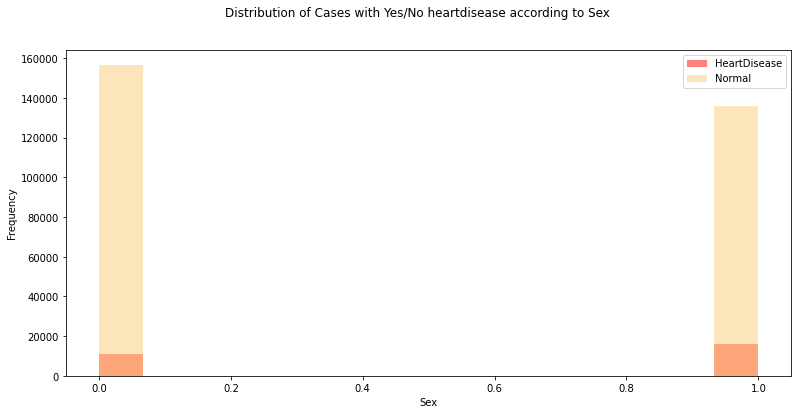

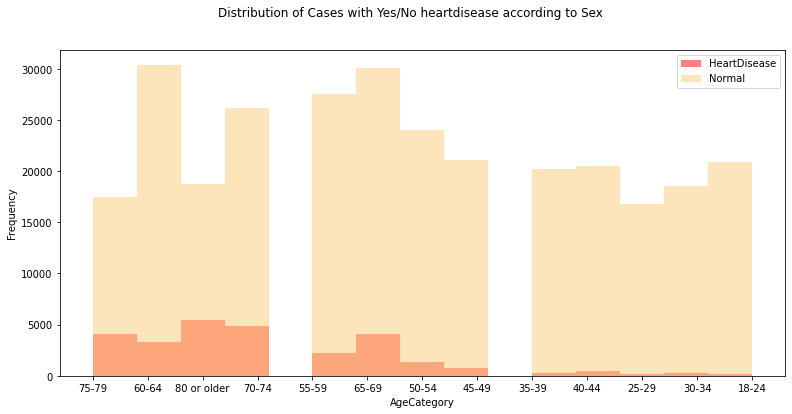

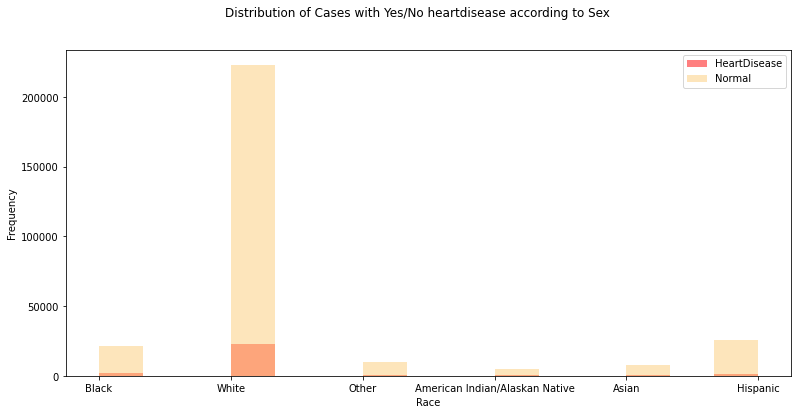

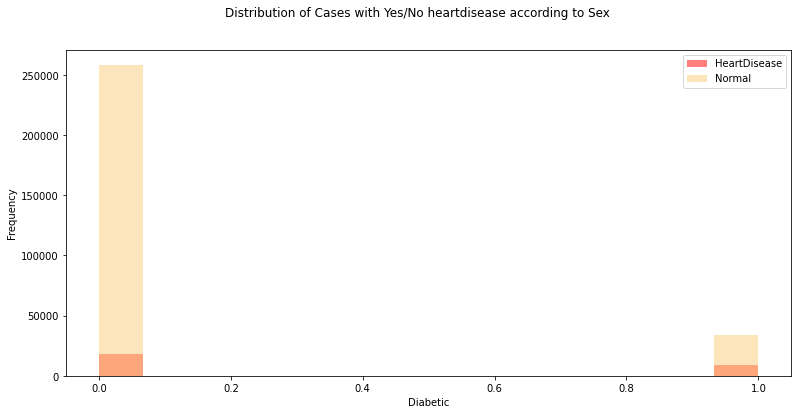

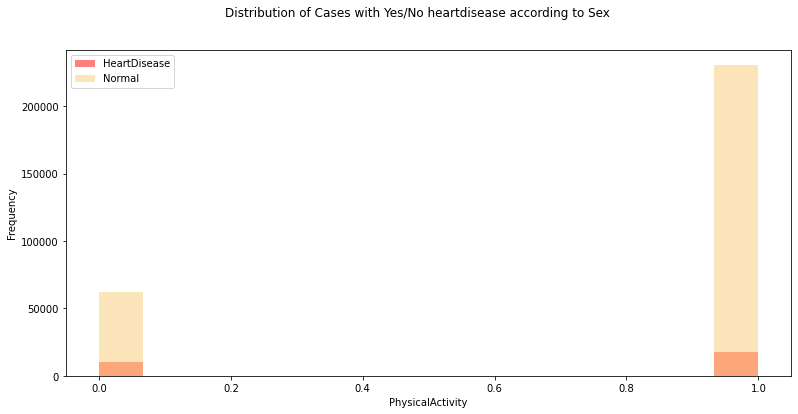

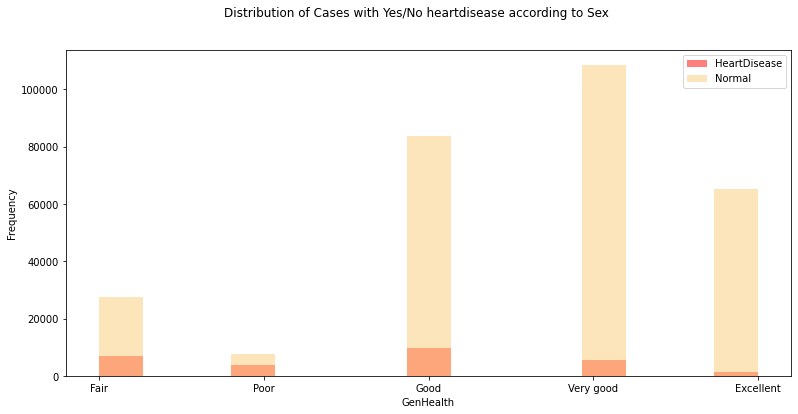

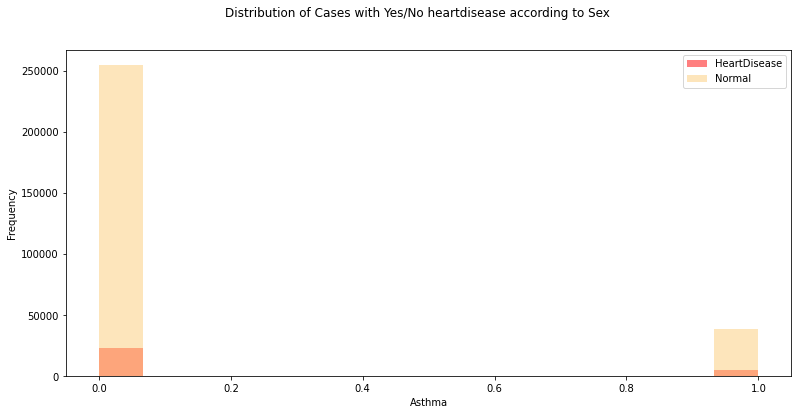

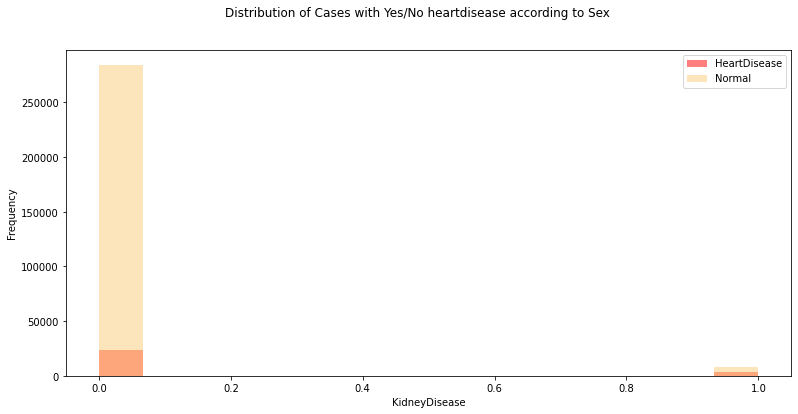

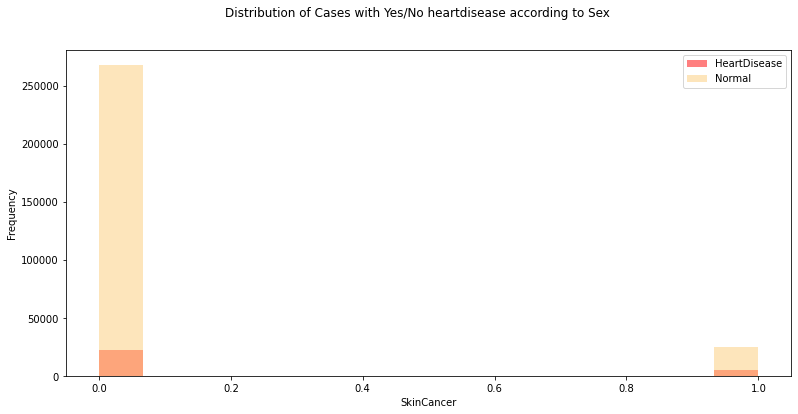

In [26]:
for col in categorical_data:
    fig, ax = plt.subplots(figsize = (13,6))

    ax.hist(categorical_data[categorical_data["HeartDisease"]==1][col], bins=15, alpha=0.5, color="red", label="HeartDisease")
    ax.hist(categorical_data[categorical_data["HeartDisease"]==0][col], bins=15, alpha=0.5, color="#fccc79", label="Normal")

    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

    fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

    ax.legend();

**** categorical_data distribution with scatter ****

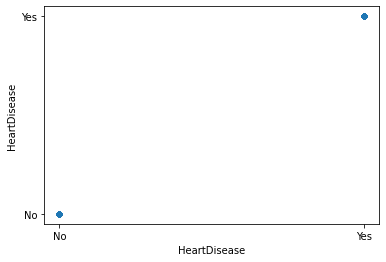

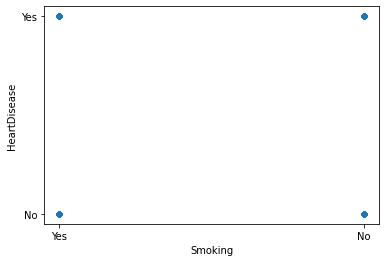

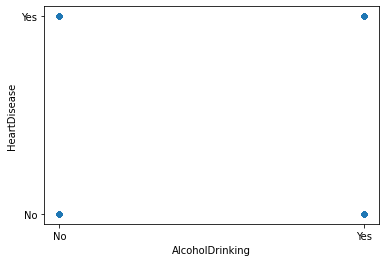

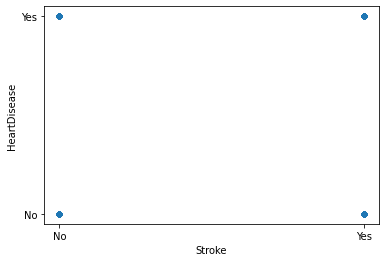

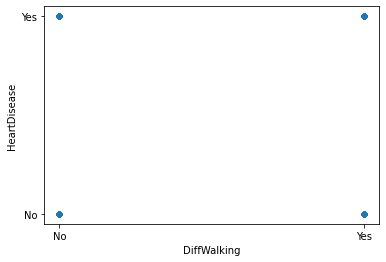

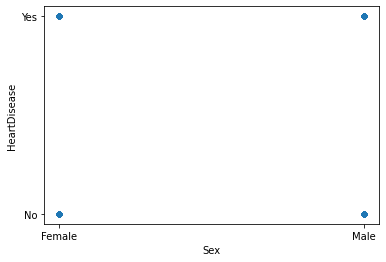

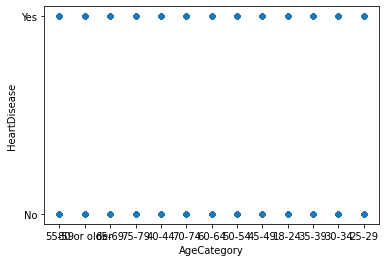

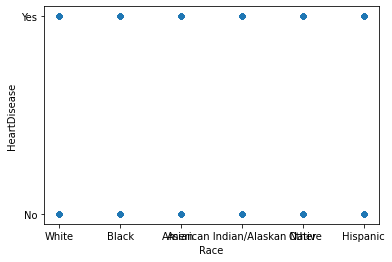

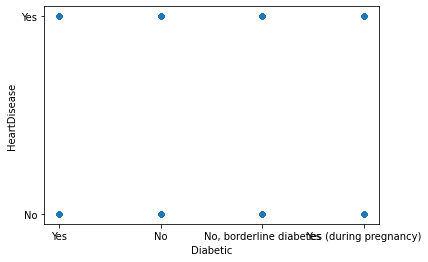

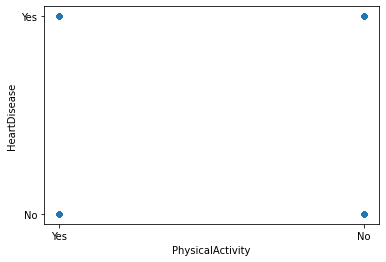

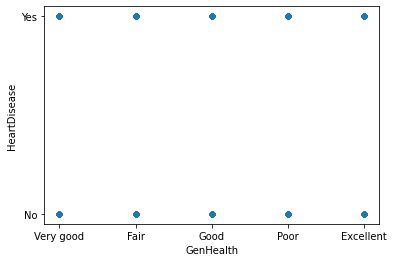

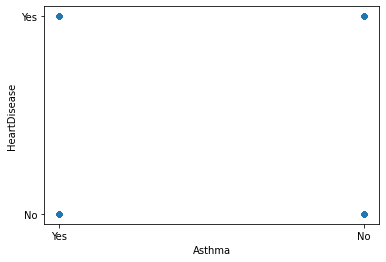

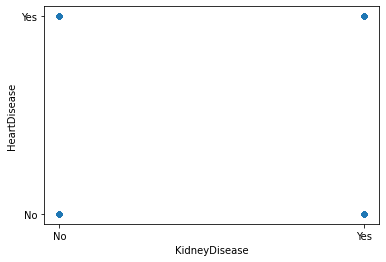

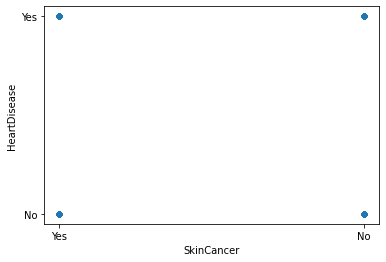

In [27]:
for col in categorical_data:
      data.plot(kind="scatter",x=col,y="HeartDisease")

## What means outlier ?

A simple example of this can be a classroom where a teacher is an outlier among all the students

However, there is no such concept of an outlier in the categorical data but categories with very lower or very higher frequency than the other categories can be considered as outliers in the categorical data.

 Detecting outliers in the categorical data is something about the comparison between the percentage of availability of data for all the categories. We can find this comparison using the bar chart or histogram. 

## Numerical data 

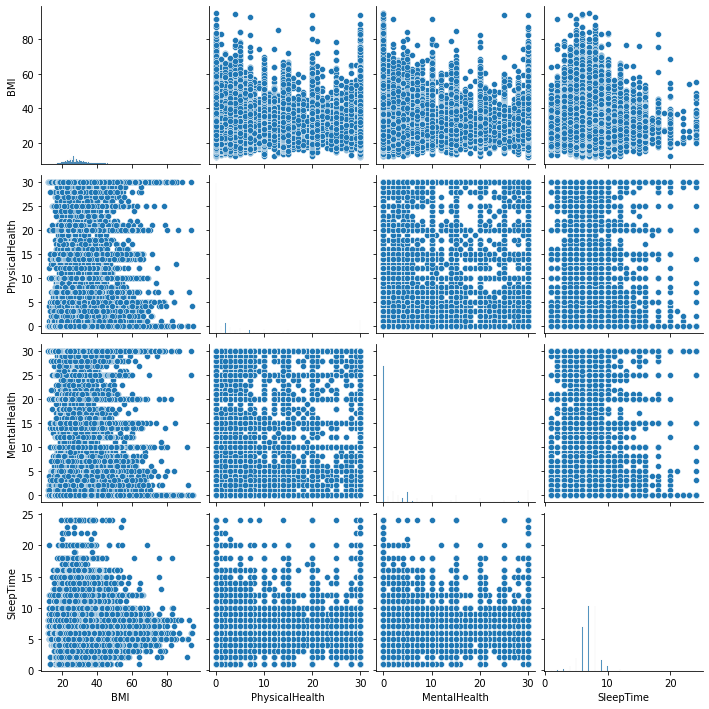

In [28]:
sns.pairplot(numerical_data)

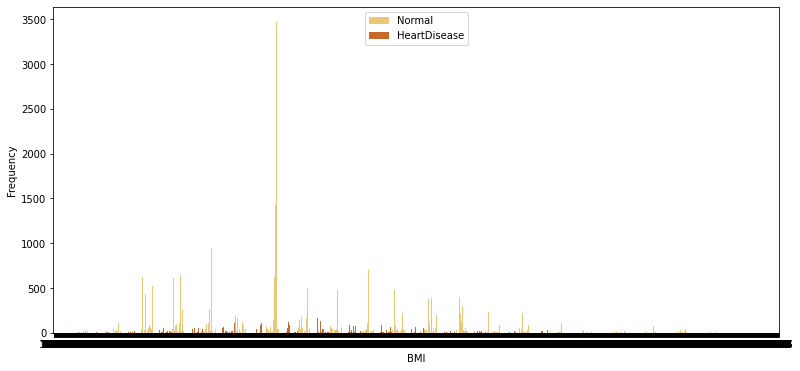

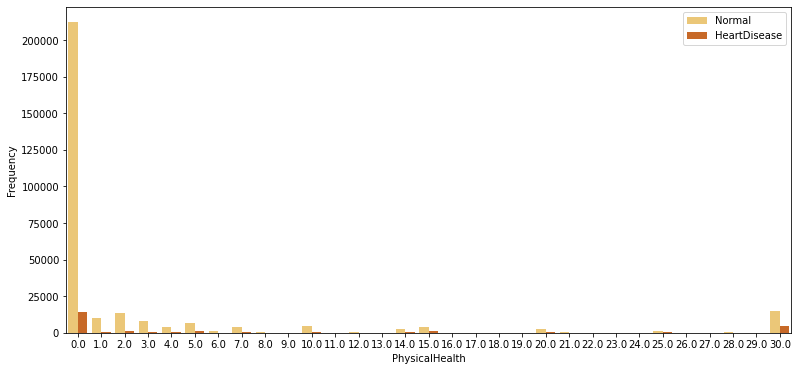

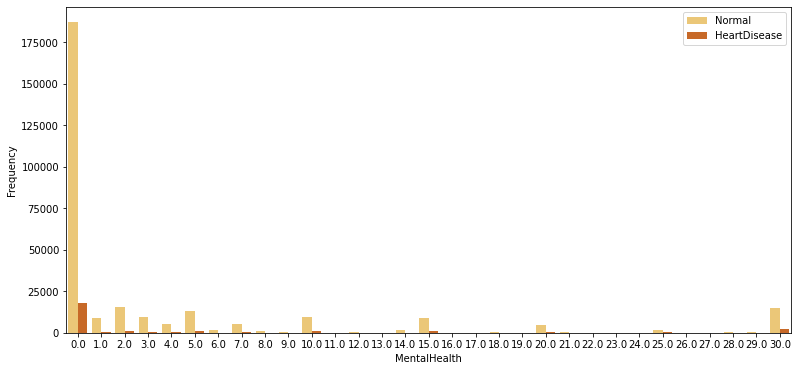

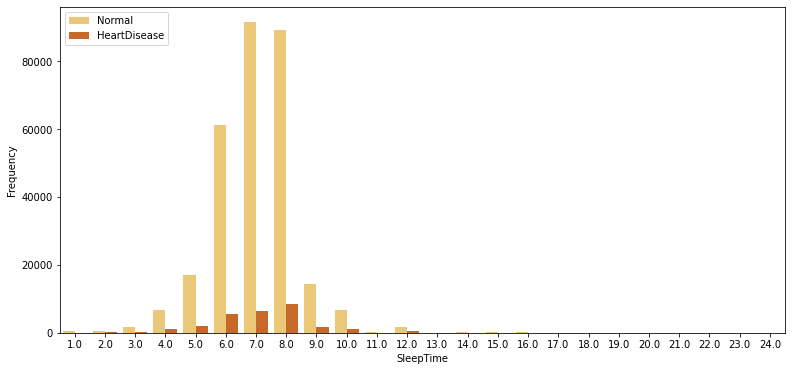

In [29]:
for col in numerical_data:
    plt.figure(figsize = (13,6))
    sns.countplot(x = numerical_data[col], hue = data['HeartDisease'], data = numerical_data, palette = 'YlOrBr')
    fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
    plt.xlabel(col)
    plt.legend(['Normal','HeartDisease'])
    plt.ylabel('Frequency')
    plt.show()

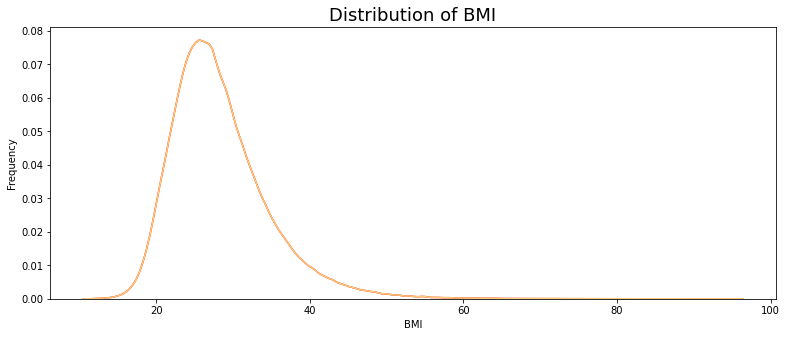

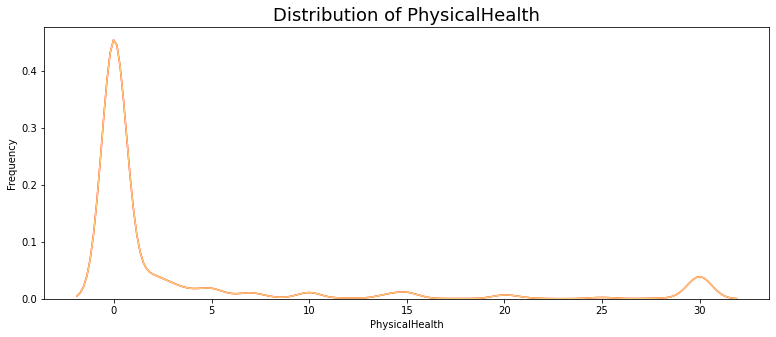

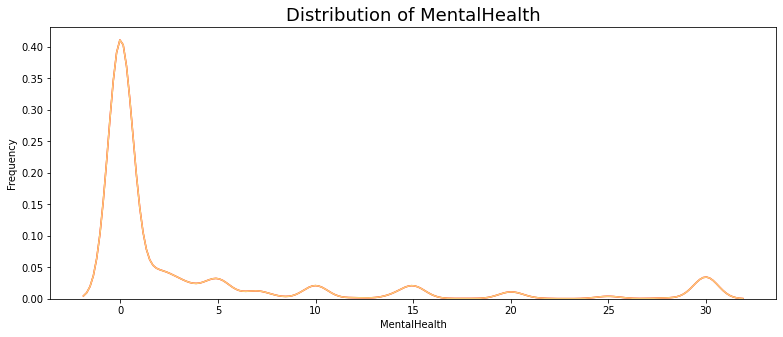

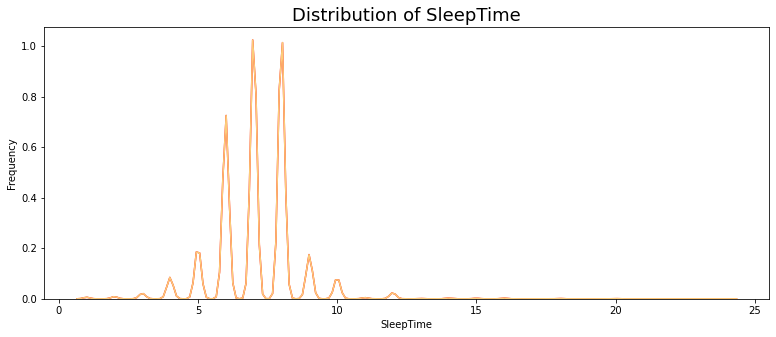

In [30]:
for col in numerical_data:
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(numerical_data[col], color="red", label="HeartDisease", ax = ax)
    sns.kdeplot(numerical_data[col],  color="#fccc79", label="Normal", ax = ax)
    plt.title('Distribution of '+col, fontsize = 18)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    plt.show()

# Missing values 

In [31]:
data.isna()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Data Preprocessing

### Encoding Categorical Data 

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [34]:
labelencoder=LabelEncoder()

In [35]:
categorical_data.nunique()

HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             2
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

*** Extract features with more than 2 classes ***

In [36]:
Categorical_oneHotEnc=pd.DataFrame([categorical_data.GenHealth,categorical_data.AgeCategory,categorical_data.Race])

In [37]:
Categorical_oneHotEnc=Categorical_oneHotEnc.T
Categorical_oneHotEnc

,GenHealth,AgeCategory,Race
0,Very good,55-59,White
1,Very good,80 or older,White
2,Fair,65-69,White
3,Good,75-79,White
4,Very good,40-44,White
...,...,...,...
319790,Fair,60-64,Hispanic
319791,Very good,35-39,Hispanic
319792,Good,45-49,Hispanic
319793,Good,25-29,Hispanic


In [38]:
categorical_data=categorical_data.drop(["GenHealth","AgeCategory","Race"],axis=1)

In [39]:
categorical_data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,1,1,1,0,1
1,0,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,1,0,1,0,0
319791,0,1,0,0,0,1,0,1,1,0,0
319792,0,0,0,0,0,0,0,1,0,0,0
319793,0,0,0,0,0,0,0,0,0,0,0


#### LabelEncoder

In [40]:
for col in categorical_data:
    categorical_data[col]=labelencoder.fit_transform(categorical_data[col])

In [41]:
categorical_data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,1,1,1,0,1
1,0,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,1,0,1,0,0
319791,0,1,0,0,0,1,0,1,1,0,0
319792,0,0,0,0,0,0,0,1,0,0,0
319793,0,0,0,0,0,0,0,0,0,0,0


#### OneHotEncoder

In [42]:
from sklearn.compose import ColumnTransformer,make_column_transformer

In [43]:
transformer = make_column_transformer((OneHotEncoder(sparse=False), ['GenHealth','AgeCategory', 'Race']),remainder='passthrough')

In [44]:
Categorical_oneHotEnc

,GenHealth,AgeCategory,Race
0,Very good,55-59,White
1,Very good,80 or older,White
2,Fair,65-69,White
3,Good,75-79,White
4,Very good,40-44,White
...,...,...,...
319790,Fair,60-64,Hispanic
319791,Very good,35-39,Hispanic
319792,Good,45-49,Hispanic
319793,Good,25-29,Hispanic


In [45]:
transformed_data = pd.DataFrame(transformer.fit_transform(Categorical_oneHotEnc),columns=transformer.get_feature_names_out())

In [46]:
transformed_data

,onehotencoder__GenHealth_Excellent,onehotencoder__GenHealth_Fair,onehotencoder__GenHealth_Good,onehotencoder__GenHealth_Poor,onehotencoder__GenHealth_Very good,onehotencoder__AgeCategory_18-24,onehotencoder__AgeCategory_25-29,onehotencoder__AgeCategory_30-34,onehotencoder__AgeCategory_35-39,onehotencoder__AgeCategory_40-44,...,onehotencoder__AgeCategory_65-69,onehotencoder__AgeCategory_70-74,onehotencoder__AgeCategory_75-79,onehotencoder__AgeCategory_80 or older,onehotencoder__Race_American Indian/Alaskan Native,onehotencoder__Race_Asian,onehotencoder__Race_Black,onehotencoder__Race_Hispanic,onehotencoder__Race_Other,onehotencoder__Race_White
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319792,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
categorical_data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,1,1,1,0,1
1,0,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,1,0,1,0,0
319791,0,1,0,0,0,1,0,1,1,0,0
319792,0,0,0,0,0,0,0,1,0,0,0
319793,0,0,0,0,0,0,0,0,0,0,0


In [48]:
categorical_data = pd.concat([categorical_data,transformed_data], axis=1)

In [49]:
categorical_data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,...,onehotencoder__AgeCategory_65-69,onehotencoder__AgeCategory_70-74,onehotencoder__AgeCategory_75-79,onehotencoder__AgeCategory_80 or older,onehotencoder__Race_American Indian/Alaskan Native,onehotencoder__Race_Asian,onehotencoder__Race_Black,onehotencoder__Race_Hispanic,onehotencoder__Race_Other,onehotencoder__Race_White
0,0,1,0,0,0,0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0,0,0,1,1,1,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319791,0,1,0,0,0,1,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319792,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Numerical Features 

### Standardization

In [50]:
from sklearn.preprocessing import StandardScaler , Normalizer


In [51]:
scaler = StandardScaler()

In [52]:
numerical_data_scaled= pd.DataFrame(scaler.fit_transform(numerical_data),columns=[numerical_data.columns])



In [53]:
numerical_data_scaled

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.844750,-0.046751,3.281069,-1.460354
1,-1.256338,-0.424070,-0.490039,-0.067601
2,-0.274603,2.091388,3.281069,0.628776
3,-0.647473,-0.424070,-0.490039,-0.763977
4,-0.726138,3.097572,-0.490039,0.628776
...,...,...,...,...
319790,-0.144019,0.456341,-0.490039,-0.763977
319791,0.238291,-0.424070,-0.490039,-1.460354
319792,-0.642753,-0.424070,-0.490039,-0.763977
319793,0.705560,-0.424070,-0.490039,3.414282


## Normalization

In [54]:
normlize=Normalizer()

In [55]:
numerical_data_normlized=pd.DataFrame(normlize.fit_transform(numerical_data))

In [56]:
numerical_data_normlized

,0,1,2,3
0,0.477303,0.086260,0.862596,0.143766
1,0.945570,0.000000,0.000000,0.325418
2,0.584141,0.439534,0.659301,0.175814
3,0.970636,0.000000,0.000000,0.240554
4,0.631389,0.745630,0.000000,0.213037
...,...,...,...,...
319790,0.947820,0.242055,0.000000,0.207476
319791,0.986251,0.000000,0.000000,0.165256
319792,0.970705,0.000000,0.000000,0.240274
319793,0.939157,0.000000,0.000000,0.343489


# Final Data 

### final Data without standardization

In [57]:
final_data1=pd.concat([numerical_data,categorical_data],axis=1)

In [58]:
final_data1

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,...,onehotencoder__AgeCategory_65-69,onehotencoder__AgeCategory_70-74,onehotencoder__AgeCategory_75-79,onehotencoder__AgeCategory_80 or older,onehotencoder__Race_American Indian/Alaskan Native,onehotencoder__Race_Asian,onehotencoder__Race_Black,onehotencoder__Race_Hispanic,onehotencoder__Race_Other,onehotencoder__Race_White
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### final Data with standardization

In [59]:
final_data2=pd.concat([numerical_data_scaled,categorical_data],axis=1)

In [60]:
final_data2

,"(BMI,)","(PhysicalHealth,)","(MentalHealth,)","(SleepTime,)",HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,...,onehotencoder__AgeCategory_65-69,onehotencoder__AgeCategory_70-74,onehotencoder__AgeCategory_75-79,onehotencoder__AgeCategory_80 or older,onehotencoder__Race_American Indian/Alaskan Native,onehotencoder__Race_Asian,onehotencoder__Race_Black,onehotencoder__Race_Hispanic,onehotencoder__Race_Other,onehotencoder__Race_White
0,-1.844750,-0.046751,3.281069,-1.460354,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,-0.067601,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.628776,0,1,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.647473,-0.424070,-0.490039,-0.763977,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.726138,3.097572,-0.490039,0.628776,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.144019,0.456341,-0.490039,-0.763977,1,1,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.238291,-0.424070,-0.490039,-1.460354,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319792,-0.642753,-0.424070,-0.490039,-0.763977,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.705560,-0.424070,-0.490039,3.414282,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Extract the target 

In [61]:
target=final_data1["HeartDisease"]

In [62]:
final_data1=final_data1.drop("HeartDisease",axis=1)

In [63]:
final_data2=final_data2.drop("HeartDisease",axis=1)

## Spliting without Standardization

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(final_data1,target,test_size=0.3,random_state=0)
#random state=0 pour fixer les parties 

## Spliting with  Standardization!

In [66]:
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled=train_test_split(final_data2,target,test_size=0.3,random_state=0)


# Modeling

## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr=LogisticRegression()

In [69]:
lr.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [70]:
y_pred_lr=lr.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report 

In [72]:
print('Acc ',accuracy_score(y_test,y_pred_lr))
print('CM lr : \n', confusion_matrix(y_test,y_pred_lr))


Acc  0.9157902417160905
CM lr : 
 [[87015   715]
 [ 7364   845]]


#### with scalling

In [73]:
lr.fit(x_train_scaled,y_train_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [74]:
y_pred_lr_scaled=lr.predict(x_test_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [75]:
print('Acc ',accuracy_score(y_test_scaled,y_pred_lr_scaled))
print('CM lr : \n', confusion_matrix(y_test_scaled,y_pred_lr_scaled))


Acc  0.9156860088181031
CM lr : 
 [[87011   719]
 [ 7370   839]]


## DecisionTreeClassifier 

In [76]:
from sklearn.tree import  DecisionTreeClassifier 

In [77]:
tree=DecisionTreeClassifier()

In [78]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred_tree=tree.predict(x_test)

In [80]:
print('Acc dr: {}'.format(accuracy_score(y_test,y_pred_tree)))

Acc dr: 0.8655082917270349


In [81]:
tree.fit(x_train_scaled,y_train_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier()

In [82]:
y_pred_tree_scaled=tree.predict(x_test_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [83]:
print('Acc dr: {}'.format(accuracy_score(y_test_scaled,y_pred_tree_scaled)))

Acc dr: 0.8653310958004565
